<a href="https://colab.research.google.com/github/Pogba666/DeepLearning/blob/main/HPE_Lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
% tensorflow_version 1.x
import tensorflow as tf
import numpy as np
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [2]:
temp = [ 0., 0., 1., 0., 0., 2., 0., 0., 1., 1.]
values = tf.reshape(temp, [1,1,2,5])

In [3]:
values
# Lazy Evaluation
# Only if TF session is started, nothing will be displayed

<tf.Tensor 'Reshape:0' shape=(1, 1, 2, 5) dtype=float32>

In [4]:
session = tf.Session()
print('original')
print(temp)
print('*******')
print('reshaped')
print(session.run(values))
session.close()

original
[0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0]
*******
reshaped
[[[[0. 0. 1. 0. 0.]
   [2. 0. 0. 1. 1.]]]]


In [5]:
avgpool = tf.nn.pool(input=values, pooling_type='AVG', 
                                padding='VALID', window_shape=(1,2))
maxpool = tf.nn.pool(input=values,pooling_type='MAX',
                                padding='VALID',window_shape=(1,2))

In [6]:
session = tf.Session()
print('original')
print(temp)
print('*******')
print('reshaped')
print(session.run(values))
print('*******')
print('avg_pool')
print(session.run(avgpool))
print('*******')
print('max_pool')
print(session.run(maxpool))
session.close()

original
[0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0]
*******
reshaped
[[[[0. 0. 1. 0. 0.]
   [2. 0. 0. 1. 1.]]]]
*******
avg_pool
[[[[1.  0.  0.5 0.5 0.5]]]]
*******
max_pool
[[[[2. 0. 1. 1. 1.]]]]


For CV

Max_Pooling -> Data Compression

Avg_Pooling -> Blur the image

In [7]:
avgpool1 = tf.nn.pool(input=values, pooling_type='AVG', 
                                padding='SAME', window_shape=(1,2))
maxpool1 = tf.nn.pool(input=values,pooling_type='MAX',
                                padding='SAME',window_shape=(1,2))

In [8]:
session = tf.Session()
print('original')
print(temp)
print('*******')
print('reshaped')
print(session.run(values))
print('*******')
print('avg_pool')
print(session.run(avgpool1))
print('*******')
print('max_pool')
print(session.run(maxpool1))
session.close()

original
[0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0]
*******
reshaped
[[[[0. 0. 1. 0. 0.]
   [2. 0. 0. 1. 1.]]]]
*******
avg_pool
[[[[1.  0.  0.5 0.5 0.5]
   [2.  0.  0.  1.  1. ]]]]
*******
max_pool
[[[[2. 0. 1. 1. 1.]
   [2. 0. 0. 1. 1.]]]]


# Regularization

ML -> L1 and L2 regularization -> ridge/lasso

Bagging and Boosting -> Used in Decisiton Trees in ML (Decision Tree, Random Forest)

Adversarial Approach -> Game theory -> Award and penalty based systemfor developing the model

Dropout more common in DL -> Lesser you know, more you know

Data Augmentation -> Twist data by math / stat / SME based transformations

Hyperparameter tuning -> best set of HPs to use

Feature Engineering -> convert raw columns into highly efficient usable ML features -> PCA,LDA, Bayesian Analysis

Early Stopping -> Do not waste resources if there are obvious mistakes or obvious problems in the model


In [9]:
# Data Augmentation
!ls

rashford.jpg  sample_data


In [10]:
!pip install Augmentor

In [11]:
import Augmentor
pipes = Augmentor.Pipeline('rashford')

Initialised with 1 image(s) found.
Output directory set to rashford/output.

In [14]:
pipes.black_and_white(0.1)
pipes.flip_left_right(0.5)
pipes.random_distortion(1, 5, 5, 1)
pipes.rotate(0.5, 25, 25)
pipes.skew(0.25, 0.25)
pipes.sample(6)

Processing <PIL.Image.Image image mode=1 size=2500x1667 at 0x7FBA4BDE9DA0>: 100%|██████████| 6/6 [00:06<00:00,  1.01s/ Samples]


In [15]:
!ls rashford/output/

rashford_original_rashford.jpg_10610c9a-94ba-4d16-8098-46b2a95525ad.jpg
rashford_original_rashford.jpg_a89989e7-3918-4043-91f1-242f46ad4786.jpg
rashford_original_rashford.jpg_c4437aa9-f23f-4cd9-93b5-67636d244481.jpg
rashford_original_rashford.jpg_d24f3010-d344-457f-84a5-036e8f520185.jpg
rashford_original_rashford.jpg_db1d66d2-7f6a-4f80-8a13-ccf21d2780f3.jpg
rashford_original_rashford.jpg_ecb52ad6-1cc7-4416-b40a-d6438a8eb378.jpg
rashford_original_rashford.jpg_f7d0934d-6907-4e6d-be70-9ab2e4a641a3.jpg


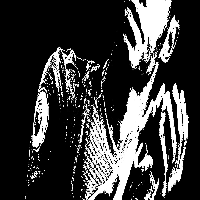

In [18]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('rashford/output/rashford_original_rashford.jpg_db1d66d2-7f6a-4f80-8a13-ccf21d2780f3.jpg')
img = cv2.resize(img, (200,200))
cv2_imshow(img)